In [1]:
# !pip install katna

In [2]:
import os
from glob import glob
from random import randint

from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from Katna.video import Video as KatnaVideo
from Katna.writer import KeyFrameDiskWriter
from IPython.display import Video as IPythonVideo

In [3]:
# Instantiate the video class
vd = KatnaVideo()

In [4]:
# Number of key-frame images to be extracted
no_of_frames_to_return = 5

In [5]:
# Input Video directory path
# All .mp4 and .mov files inside this directory will be used for keyframe extraction)
videos_folder_path = 'video'
key_frames_folder = 'key_frames'

In [6]:
diskwriter = KeyFrameDiskWriter(location=key_frames_folder)

In [7]:
vd.extract_keyframes_from_videos_dir(
    no_of_frames=no_of_frames_to_return,
    dir_path=videos_folder_path,
    writer=diskwriter
)

Running for :  video/6.mp4
Completed processing for :  video/6.mp4
Running for :  video/4.mp4
Completed processing for :  video/4.mp4
Running for :  video/5.mp4
Completed processing for :  video/5.mp4
Running for :  video/1.mp4
Completed processing for :  video/1.mp4
Running for :  video/2.mp4
Completed processing for :  video/2.mp4
Running for :  video/3.mp4
Completed processing for :  video/3.mp4


In [8]:
video_paths = glob(os.path.join(videos_folder_path, '*.mp4'))
random_video_path = video_paths[randint(0, len(video_paths) - 1)]
random_video_path

'video/6.mp4'

In [9]:
os.path.join(
    random_video_path.replace(videos_folder_path, key_frames_folder).split('.')[0],
    '_*.jpeg'
)

'key_frames/6/_*.jpeg'

In [10]:
random_img_paths = glob(
    f"{random_video_path.replace(videos_folder_path, key_frames_folder).split('.')[0]}*.jpeg",
)
random_img_paths = sorted(random_img_paths)
random_img_paths

['key_frames/6_0.jpeg',
 'key_frames/6_1.jpeg',
 'key_frames/6_2.jpeg',
 'key_frames/6_3.jpeg',
 'key_frames/6_4.jpeg']

In [11]:
def display_images(image_paths, rows, cols):  
    num_images = min(len(image_paths), rows * cols)
    fig, axes = plt.subplots(rows, cols, figsize=(15, 8))

    for i in range(num_images):
        img = mpimg.imread(image_paths[i])
        ax = axes[i // cols, i % cols]
        ax.imshow(img)
        ax.set_title(os.path.basename(image_paths[i]))
        ax.axis('off')
    
    # Hide any remaining subplots
    for i in range(num_images, rows * cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

In [12]:
IPythonVideo(random_video_path)

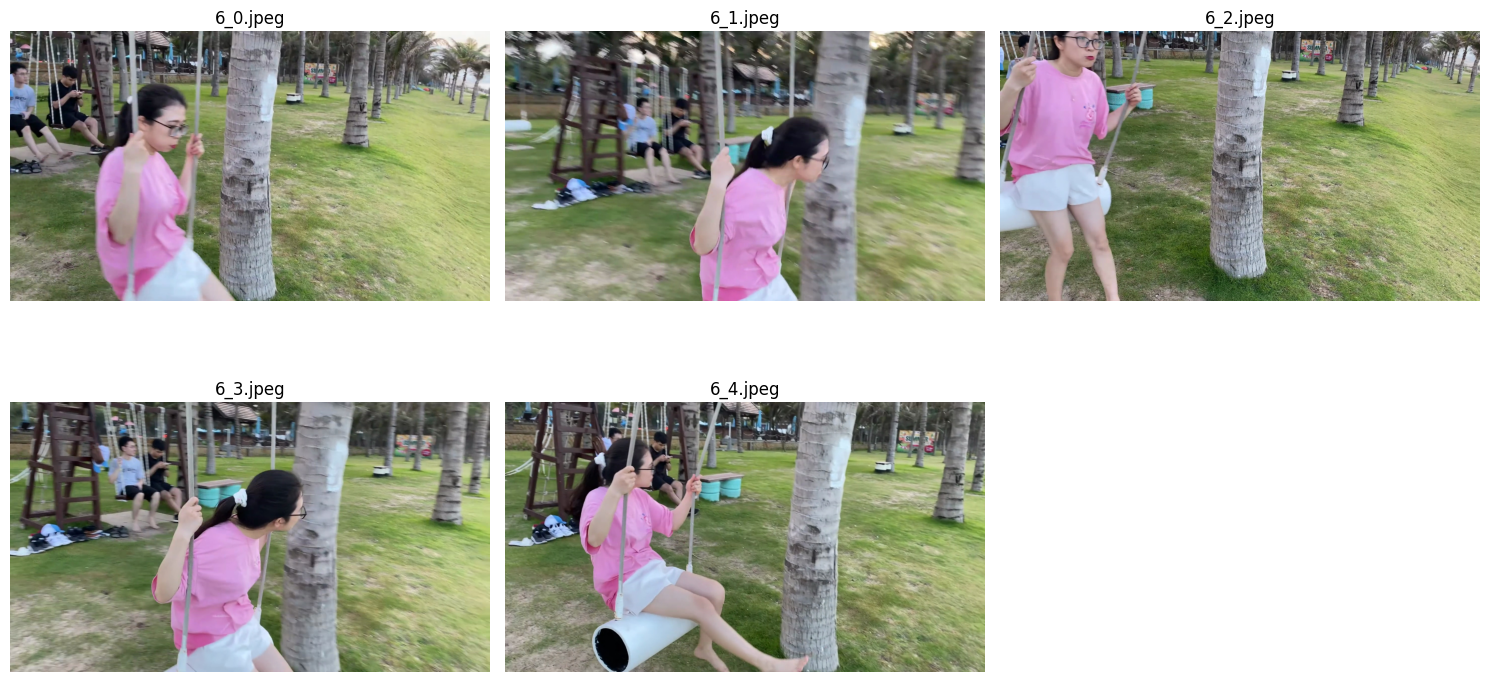

In [13]:
display_images(random_img_paths, 2, 3)